In [1]:
from __future__ import division
import argparse
import tensorflow as tf
from tensorflow.keras import layers

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

print(tf.VERSION)
print(tf.keras.__version__)

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from PIL import Image
import os
from glob import glob
import seaborn as sns
import cv2
from keras.utils.np_utils import to_categorical 
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout,Activation, Flatten, Conv2D, MaxPool2D, LSTM, TimeDistributed
from keras import backend as K
import itertools
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical 
from keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split


from ipynb.fs.full.Creating_Labels_Fn import read_images1, read_images2,labels_quick,labels_quick_order, create_image_data, breakdown, create_subset,subplots, combine, normalize, plots1, plots2

import re

1.14.0
2.2.4-tf


Using TensorFlow backend.
W0819 12:41:39.485470 140608192214848 deprecation_wrapper.py:119] From /home/clk3/Datasets/Multi class weather dataset/Python/Creating_Labels_Fn.ipynb:16: The name tf.VERSION is deprecated. Please use tf.version.VERSION instead.



1.14.0
2.2.4-tf


# 1) Read in Images

Defining the classes/labels used - we only look at four categories of images, shown in the classes_final list, and the classes_total contains the extra three labels which were not used

In [2]:
classes_total = ["cloudy",  "shine","rain", "snow", "sunrise", "foggy", "z-other"]
classes_final = ["cloudy",  "shine","rain", "snow"]

## Dataset (a) - Multi Class Weather Dataset 

This dataset has roughly 1000 images, over *4 labels* - **cloudy, rain, shine and sunrise *(sunrise is not used as a category at the moment, will only be looking at the first 3 labels)***

The actual breakdown of proportions is shown later:

In [3]:
base_dir = os.path.join('/home/clk3/Datasets/Multi class weather dataset', 'dataset2') #directory for images

In [4]:
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_dir, '*.jpg'))}

**Creating Labels:**

In [5]:
class_dict = read_images1(imageid_path_dict, classes_total)
labels_num , labels_list =labels_quick(imageid_path_dict, class_dict, classes_final)

(760, 1)


**Creating Dataset of Images:**

In [6]:
data = create_image_data(imageid_path_dict, classes_final, class_dict)

(760, 75, 100, 3)


**Breakdown of Categories:**

In [7]:
breakdown(labels_list, classes_final)

cloudy : 299 0.393
shine : 251 0.33
rain : 210 0.276
snow : 0 0.0
760


## Dataset (b) - Camera as Weather Sensor Dataset 

This dataset has 183798 images over *6 labels* - **rain, cloudy, sunny *(called shine in dataset (a) and will be referred to as shine from now on)*, snow, fog and z-other**. Z-other will be ignored, and unfortunately fog has too few images to be included. Snow is a good addition and is the fourth category we will be looking at.

However, once you remove z-other, over 90% of the images are contained in the shine and cloudy labels - this will be reduced.

In [8]:
base2_dir = '/home/clk3/Datasets/Camera as Weather Sensor/Image'

In [9]:
imageid_path_dict2 = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base2_dir,"*", '*.jpg'))}

**Creating Labels:**

In [10]:
class_dict2 = read_images2(imageid_path_dict2, classes_total)
labels_num2, labels_list2 =labels_quick(imageid_path_dict2, class_dict2, classes_final)

(118784, 1)


**Breakdown of Categories:**

In [11]:
breakdown(labels_list2, classes_final)

cloudy : 45662 0.384
shine : 70501 0.594
rain : 1369 0.012
snow : 1252 0.011
118784


Need to reduce shine and cloudy (won't be looking at the other category), to 3000 images each. Need to create a subset of the original dataset with 8978 images. 

### Creating a Subset of this dataset (b):

In [12]:
limit = [3000,3000,3000,3000] # for each label, the total number of images we wish to keep
subset,labels_num_subset, labels_list_subset, class_subset = create_subset(imageid_path_dict2, class_dict2, classes_final, limit)

(8621, 1)


**Breakdown of Categories:**

In [13]:
breakdown(labels_list_subset, classes_final)

cloudy : 3000 0.348
shine : 3000 0.348
rain : 1369 0.159
snow : 1252 0.145
8621


**Creating dataset of images (subset only):**

In [14]:
data2 = create_image_data(subset, classes_final, class_subset)

(8621, 75, 100, 3)


**Quick look at some images:**

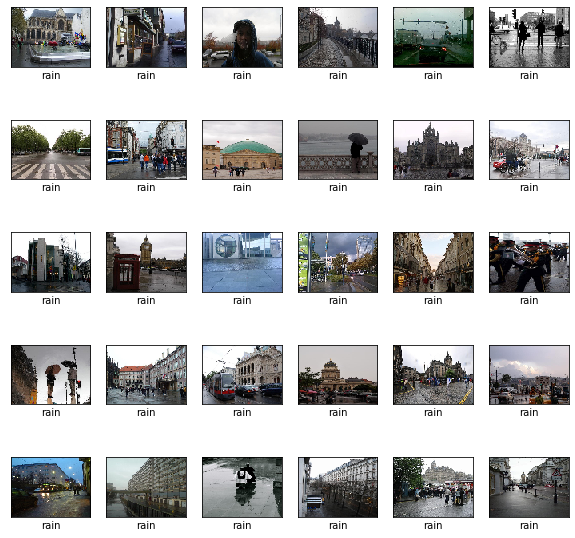

In [15]:
subplots(data2, labels_list_subset)

## Combining the two datasets (a) and (b)

In [16]:
images, class_dict3 = combine(imageid_path_dict, subset, class_dict, class_subset)

**Creating Labels:**

In [17]:
labels_num3 , labels_list3 = labels_quick(images, class_dict3, classes_final)

(9381, 1)


**Breakdown:**

In [18]:
breakdown(labels_list3, classes_final)

cloudy : 3299 0.352
shine : 3251 0.347
rain : 1579 0.168
snow : 1252 0.133
9381


**Creating Dataset of Images:**

In [19]:
data3 = create_image_data(images, classes_final, class_dict3)

(9381, 75, 100, 3)


##  Data Set - RobotCar Driving Images for Training + Test

In [20]:
test_dir = '/home/clk3/Datasets/RobotCar_Altered'

imageid_path_dict4 = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(test_dir,"*", '*.png'))}

In [21]:
list_keys = [ k for k in imageid_path_dict4 ]

In [22]:
list_keys_subset, other = train_test_split(list_keys, test_size=(3/4), random_state = 2000)

In [23]:
driving_train, driving_test = train_test_split(list_keys_subset, test_size=(1/7), random_state = 2000)

**Training**

In [24]:
imageid_path_dict5 = {imageid_path_dict4[k]: k for k in driving_train}
imageid_path_dict5 = {imageid_path_dict5[k]:k for k in imageid_path_dict5}

In [25]:
class_dict5 = read_images2(imageid_path_dict5, classes_final)

In [26]:
labels_num5, labels_list5 =labels_quick(imageid_path_dict5 , class_dict5, classes_final)

(9714, 1)


In [27]:
breakdown(labels_list5, classes_final)

cloudy : 2538 0.261
shine : 2019 0.208
rain : 2585 0.266
snow : 2572 0.265
9714


**Test**

In [28]:
imageid_path_dict6 = {imageid_path_dict4[k]: k for k in driving_test}
imageid_path_dict6 = {imageid_path_dict6[k]:k for k in imageid_path_dict6}

In [29]:
class_dict6 = read_images2(imageid_path_dict6, classes_final)

In [30]:
labels_num6, labels_list6 =labels_quick(imageid_path_dict6 , class_dict6, classes_final)

(1620, 1)


In [31]:
breakdown(labels_list6, classes_final)

cloudy : 449 0.277
shine : 333 0.206
rain : 427 0.264
snow : 411 0.254
1620


**Creating dataset of train images:**

In [32]:
data_t1 = []
for x in imageid_path_dict5:
    oimg = cv2.imread(imageid_path_dict5[x])[...,::-1]
    nimg = cv2.resize(oimg,(100,75))
    data_t1.append(nimg)


In [33]:
data4 = np.asarray(data_t1)
data4.shape

(9714, 75, 100, 3)

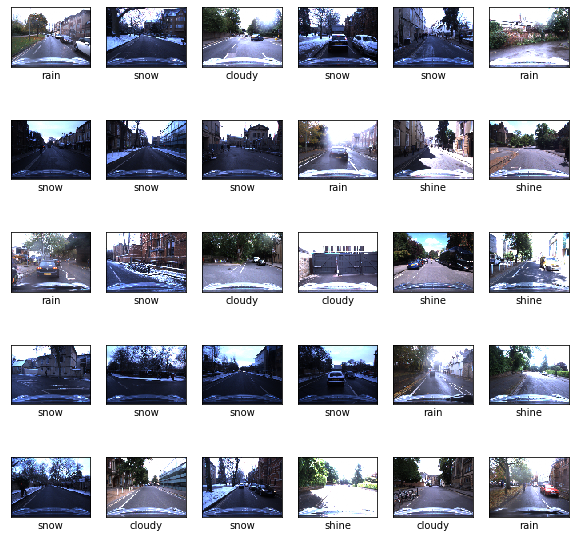

In [34]:
subplots(data4, labels_list5)

In [35]:
data4.shape

(9714, 75, 100, 3)

**Creating dataset of test images:**

In [36]:
data_t2 = []
for x in imageid_path_dict6:
    oimg = cv2.imread(imageid_path_dict6[x])[...,::-1]
    nimg = cv2.resize(oimg,(100,75))
    data_t2.append(nimg)


In [37]:
data5 = np.asarray(data_t2)
data5.shape

(1620, 75, 100, 3)

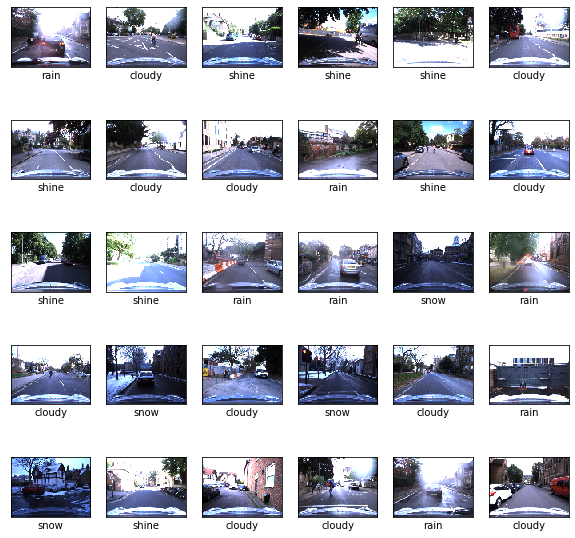

In [38]:
subplots(data5, labels_list6)

In [39]:
data5.shape

(1620, 75, 100, 3)

# 2) Image Processing and Model building

## N.B N.B For Both Datasets Combined:

In [40]:
num_classes = len(classes_final) # no sunrise or foggy labels

**General Weather Sets:**

In [41]:
x_train_o, x_test_o, y_train_G, y_test_G = train_test_split(data3, labels_num3, test_size=0.20,random_state=5604)

*Normalising the Input Images:*

In [42]:
x_train_G = normalize(x_train_o)
x_test_G = normalize(x_test_o)

In [43]:
x_train_G, x_val_G, y_train_G, y_val_G = train_test_split(x_train_G, y_train_G, test_size = 0.1, random_state = 50)

**Driving Sets**

In [44]:
x_train_o = data4
x_test_o = data5 
y_train_d = labels_num5
y_test_d = labels_num6

In [45]:
x_train_d = normalize(x_train_o)
x_test_d = normalize(x_test_o)

In [46]:
x_train_d, x_val_d, y_train_d, y_val_d = train_test_split(x_train_d, y_train_d, test_size = 0.1, random_state = 50)

## Model_1

In [47]:
model_1 = keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation=tf.nn.relu,padding="same", input_shape=x_train_d.shape[1:]),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(32,(3,3),activation=tf.nn.relu,padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.4),
    
    keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu,padding="same"),
    keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu,padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.5),
    
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])
model_1.summary()

model_1.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

W0819 12:50:59.729251 140608192214848 deprecation.py:506] From /home/clk3/.local/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 75, 100, 32)       896       
_________________________________________________________________
dropout (Dropout)            (None, 75, 100, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 100, 32)       9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 50, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 50, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 50, 64)        3

***Fitting the model with general weather images:***

In [48]:
%%time
history1 = model_1.fit(x_train_G,y_train_G, epochs=5, batch_size=100, validation_data=(x_val_G, y_val_G), verbose=1)

Train on 6753 samples, validate on 751 samples
Epoch 1/5
6753/6753 [==============================] - 84s 12ms/sample - loss: 1.1433 - acc: 0.5438 - val_loss: 0.9610 - val_acc: 0.6232
Epoch 2/5
6753/6753 [==============================] - 82s 12ms/sample - loss: 0.9285 - acc: 0.6215 - val_loss: 0.9207 - val_acc: 0.6431
Epoch 3/5
6753/6753 [==============================] - 82s 12ms/sample - loss: 0.8796 - acc: 0.6439 - val_loss: 0.8446 - val_acc: 0.6804
Epoch 4/5
6753/6753 [==============================] - 82s 12ms/sample - loss: 0.8428 - acc: 0.6619 - val_loss: 0.8381 - val_acc: 0.6778
Epoch 5/5
6753/6753 [==============================] - 83s 12ms/sample - loss: 0.8199 - acc: 0.6729 - val_loss: 0.8077 - val_acc: 0.6778
CPU times: user 57min 59s, sys: 5min 13s, total: 1h 3min 12s
Wall time: 6min 55s


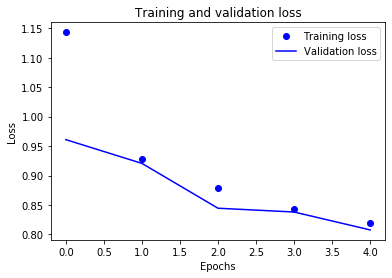

In [49]:
plots1(history1)

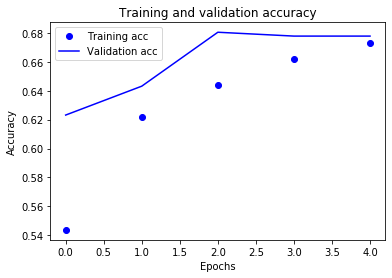

In [50]:
plots2(history1)

**General Test Set:**

In [51]:
model_1.evaluate(x_test_G,y_test_G)

1877/1877 [==============================] - 2s 1ms/sample - loss: 0.7771 - acc: 0.6883


[0.7771128817448034, 0.68833244]

**Driving Test Set:**

In [52]:
model_1.evaluate(x_test_d,y_test_d)

1620/1620 [==============================] - 2s 1ms/sample - loss: 2.8477 - acc: 0.1574


[2.8477493904255056, 0.1574074]

***Fitting the model with driving images:***

In [53]:
%%time
history2 = model_1.fit(x_train_d,y_train_d, epochs=5, batch_size=100, validation_data=(x_val_d, y_val_d), verbose=1)

Train on 8742 samples, validate on 972 samples
Epoch 1/5
8742/8742 [==============================] - 108s 12ms/sample - loss: 0.9874 - acc: 0.5279 - val_loss: 0.4241 - val_acc: 0.8652
Epoch 2/5
8742/8742 [==============================] - 109s 12ms/sample - loss: 0.4509 - acc: 0.8467 - val_loss: 0.1425 - val_acc: 0.9609
Epoch 3/5
8742/8742 [==============================] - 107s 12ms/sample - loss: 0.3085 - acc: 0.9014 - val_loss: 0.0952 - val_acc: 0.9743
Epoch 4/5
8742/8742 [==============================] - 107s 12ms/sample - loss: 0.2252 - acc: 0.9423 - val_loss: 0.0567 - val_acc: 0.9825
Epoch 5/5
8742/8742 [==============================] - 107s 12ms/sample - loss: 0.1734 - acc: 0.9590 - val_loss: 0.0387 - val_acc: 0.9918
CPU times: user 1h 14min 53s, sys: 6min 36s, total: 1h 21min 30s
Wall time: 8min 57s


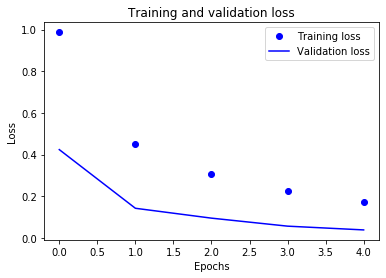

In [55]:
plots1(history2)

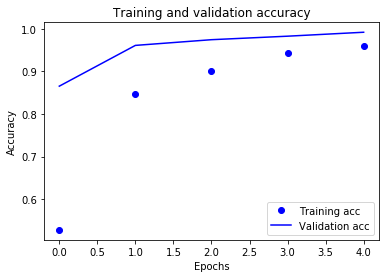

In [56]:
plots2(history2)

**Test Set with Driving**

In [58]:
model_1.evaluate(x_test_d, y_test_d)

1620/1620 [==============================] - 2s 1ms/sample - loss: 0.0406 - acc: 0.9932


[0.04062308566069897, 0.9932099]

#### Attempting Data Augmentation (using model_1 again):

In [86]:
model_1a = keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation=tf.nn.relu,padding="same", input_shape=x_train_G.shape[1:]),
    #keras.layers.Dropout(0.2),
    keras.layers.Conv2D(32,(3,3),activation=tf.nn.relu,padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu,padding="same"),
    keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu,padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])
model_1a.summary()

model_1a.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 75, 100, 32)       896       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 75, 100, 32)       9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 37, 50, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 37, 50, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 37, 50, 64)        18496     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 37, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 18, 25, 64)       

In [87]:
datagen = ImageDataGenerator(
        horizontal_flip=True,  # randomly flip images
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1)  # randomly shift images horizontally (fraction of total width))  

#datagen.fit(x_train)
#cannot use vertical flips since this would change  our understanding of a scene if it were inverted vertically (up would be down), whereas left beign right is acceptable.

*Fitting the model with general weather images:*

In [88]:
datagen.fit(x_train_G)

In [89]:
%%time
history_aug1 = model_1a.fit_generator(datagen.flow(x_train_G,y_train_G, batch_size=32),
                              epochs = 15, validation_data = (x_val_G,y_val_G),
                              verbose = 1, steps_per_epoch=x_train_G.shape[0] // 32)



Epoch 1/15
211/211 [==============================] - 72s 341ms/step - loss: 0.9900 - acc: 0.5914 - val_loss: 0.8870 - val_acc: 0.6605
Epoch 2/15
211/211 [==============================] - 71s 335ms/step - loss: 0.8809 - acc: 0.6445 - val_loss: 0.8233 - val_acc: 0.6711
Epoch 3/15
211/211 [==============================] - 71s 336ms/step - loss: 0.8119 - acc: 0.6703 - val_loss: 0.8103 - val_acc: 0.6698
Epoch 4/15
211/211 [==============================] - 71s 335ms/step - loss: 0.7824 - acc: 0.6835 - val_loss: 0.7588 - val_acc: 0.7017
Epoch 5/15
211/211 [==============================] - 71s 335ms/step - loss: 0.7488 - acc: 0.6978 - val_loss: 0.7830 - val_acc: 0.6871
Epoch 6/15
211/211 [==============================] - 71s 336ms/step - loss: 0.7233 - acc: 0.7069 - val_loss: 0.7311 - val_acc: 0.7071
Epoch 7/15
211/211 [==============================] - 71s 335ms/step - loss: 0.7106 - acc: 0.7197 - val_loss: 0.7467 - val_acc: 0.7031
Epoch 8/15
211/211 [==============================] - 7

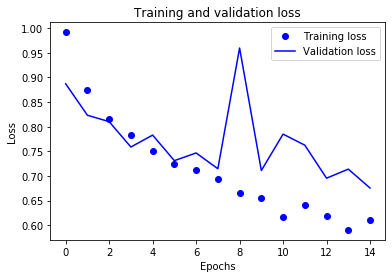

In [90]:
plots1(history_aug1)

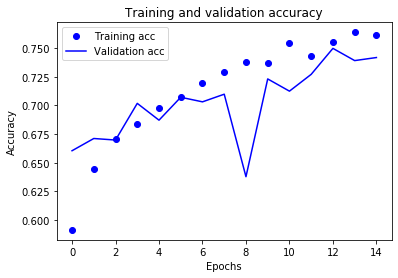

In [91]:
plots2(history_aug1)

**Test Set with General Dataset**

In [92]:
model_1a.evaluate(x_test_G, y_test_G)

1877/1877 [==============================] - 2s 1ms/sample - loss: 0.5996 - acc: 0.7693


[0.5996381162834981, 0.76931274]

**Test Set with Driving Data**

In [93]:
model_1a.evaluate(x_test_d, y_test_d)

1620/1620 [==============================] - 2s 1ms/sample - loss: 3.1011 - acc: 0.2525


[3.1011249601105115, 0.25246912]

*Fitting the model with driving images:*

In [73]:
datagen.fit(x_train_d)

In [74]:
%%time
history_aug2 = model_1a.fit_generator(datagen.flow(x_train_d,y_train_d, batch_size=32),
                              epochs = 7, validation_data = (x_val_d,y_val_d),
                              verbose = 1, steps_per_epoch=x_train_d.shape[0] // 32)


Epoch 1/7
273/273 [==============================] - 92s 335ms/step - loss: 0.7064 - acc: 0.6711 - val_loss: 0.2095 - val_acc: 0.9455
Epoch 2/7
273/273 [==============================] - 91s 335ms/step - loss: 0.3118 - acc: 0.8846 - val_loss: 0.0967 - val_acc: 0.9712
Epoch 3/7
273/273 [==============================] - 91s 335ms/step - loss: 0.2304 - acc: 0.9165 - val_loss: 0.1103 - val_acc: 0.9609
Epoch 4/7
273/273 [==============================] - 92s 335ms/step - loss: 0.1715 - acc: 0.9363 - val_loss: 0.0874 - val_acc: 0.9660
Epoch 5/7
273/273 [==============================] - 91s 335ms/step - loss: 0.1396 - acc: 0.9460 - val_loss: 0.0510 - val_acc: 0.9825
Epoch 6/7
273/273 [==============================] - 93s 339ms/step - loss: 0.1367 - acc: 0.9468 - val_loss: 0.0283 - val_acc: 0.9877
Epoch 7/7
273/273 [==============================] - 91s 335ms/step - loss: 0.1086 - acc: 0.9546 - val_loss: 0.0333 - val_acc: 0.9897
CPU times: user 1h 36min 28s, sys: 1min 29s, total: 1h 37min 5

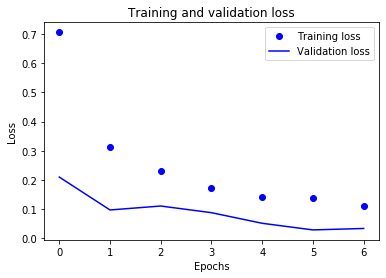

In [75]:
plots1(history_aug2)

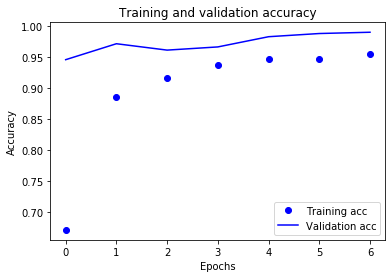

In [76]:
plots2(history_aug2)

**Test Set with Driving Data**

In [77]:
model_1a.evaluate(x_test_d, y_test_d)

1620/1620 [==============================] - 2s 1ms/sample - loss: 0.0496 - acc: 0.9870


[0.049624775844499654, 0.98703706]

# Extras

### VGG Attempt

In [28]:
base_model = VGG16(include_top=False,  input_tensor=None, input_shape=x_train.shape[1:])

W0717 14:55:39.257727 140377095792448 deprecation_wrapper.py:119] From /home/clk3/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 14:55:39.438256 140377095792448 deprecation_wrapper.py:119] From /home/clk3/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 14:55:39.459606 140377095792448 deprecation_wrapper.py:119] From /home/clk3/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0717 14:55:39.523332 140377095792448 deprecation_wrapper.py:119] From /home/clk3/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



58892288/58889256 [==============================] - 116s 2us/step


W0717 14:57:36.752860 140377095792448 deprecation_wrapper.py:119] From /home/clk3/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.



In [68]:
x = base_model.output
x = Flatten(name="flatten")(x)
x = Dense(3072, activation='relu', name='dense_1')(x)
x = Dropout(0.5)(x)
x = Dense(3072, activation='relu', name='dense_2')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, name='dense_3_{}'.format(num_classes))(x)
predictions = Activation("softmax", name="softmax")(x)


In [69]:
model = Model(input=base_model.input, output=predictions)

/home/clk3/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("so...)`
  """Entry point for launching an IPython kernel.


In [70]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 75, 100, 3)        0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 75, 100, 64)       1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 75, 100, 64)       36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 37, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 37, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 37, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 18, 25, 128)       0         
__________

In [71]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [60]:
%%time
history = model.fit(x_train,y_train, epochs=1, batch_size=32, validation_data=(x_val, y_val), verbose=1)

Train on 6753 samples, validate on 751 samples
Epoch 1/1
6753/6753 [==============================] - 392s 58ms/step - loss: 12.8506 - acc: 0.2027 - val_loss: 13.8860 - val_acc: 0.1385
CPU times: user 1h 4min 9s, sys: 1min 32s, total: 1h 5min 42s
Wall time: 6min 33s


In [72]:
%%time
history2 = model.fit_generator(datagen.flow(x_train,y_train, batch_size=32),
                                            epochs = 2, validation_data = (x_val,y_val),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // 32)

Epoch 1/2
211/211 [==============================] - 469s 2s/step - loss: 12.5827 - acc: 0.2193 - val_loss: 11.3750 - val_acc: 0.2943
Epoch 2/2
211/211 [==============================] - 469s 2s/step - loss: 12.7259 - acc: 0.2105 - val_loss: 11.3750 - val_acc: 0.2943
CPU times: user 2h 32min 43s, sys: 9min 12s, total: 2h 41min 55s
Wall time: 15min 38s


VGG is not preforming well - Why?

### For Multi Weather Set (a) (ignore from now one)

In [31]:
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(data, labels_num, test_size=0.20,random_state=1234)

*Normalising the Input Images:*

In [32]:
x_train_mean = np.mean(x_train_o)

In [33]:
x_train_std = np.std(x_train_o)

In [34]:
x_test_mean = np.mean(x_test_o)
x_test_std = np.std(x_test_o)

In [35]:
x_train = (x_train_o - x_train_mean)/x_train_std

In [36]:
x_test = (x_test_o - x_test_mean)/x_test_std

In [37]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train_o, test_size = 0.1, random_state = 2)

Model Building

In [45]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation=tf.nn.relu,padding="same", input_shape=x_train.shape[1:]),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    
    keras.layers.Conv2D(32,(3,3),activation=tf.nn.relu,padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    
    keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu,padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(3, activation=tf.nn.softmax)
])
model.summary()

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 75, 100, 32)       896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 50, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 37, 50, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 37, 50, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 18, 25, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 18, 25, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 18, 25, 64)       

In [46]:
%%time
history = model.fit(x_train,y_train, epochs=6, batch_size=5, validation_data=(x_val, y_val), verbose=1)

Train on 547 samples, validate on 61 samples
Epoch 1/6
547/547 [==============================] - 2s 4ms/sample - loss: 0.8565 - acc: 0.6143 - val_loss: 0.5238 - val_acc: 0.8361
Epoch 2/6
547/547 [==============================] - 2s 4ms/sample - loss: 0.5734 - acc: 0.7751 - val_loss: 0.3619 - val_acc: 0.8852
Epoch 3/6
547/547 [==============================] - 2s 4ms/sample - loss: 0.4498 - acc: 0.8282 - val_loss: 0.3983 - val_acc: 0.9016
Epoch 4/6
547/547 [==============================] - 2s 4ms/sample - loss: 0.3900 - acc: 0.8647 - val_loss: 0.3618 - val_acc: 0.9180
Epoch 5/6
547/547 [==============================] - 2s 4ms/sample - loss: 0.2783 - acc: 0.8940 - val_loss: 0.4164 - val_acc: 0.8197
Epoch 6/6
547/547 [==============================] - 2s 4ms/sample - loss: 0.2281 - acc: 0.9104 - val_loss: 0.4366 - val_acc: 0.8033
CPU times: user 1min 24s, sys: 3.63 s, total: 1min 27s
Wall time: 12.3 s


In [47]:
model.evaluate(x_test, y_test_o)

152/152 [==============================] - 0s 626us/sample - loss: 0.4695 - acc: 0.8618


[0.4695171541289279, 0.8618421]

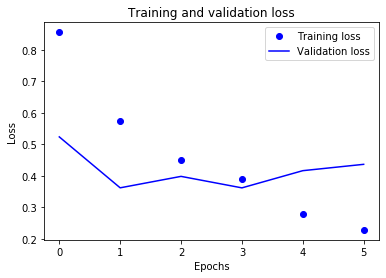

In [48]:
plots1(history)

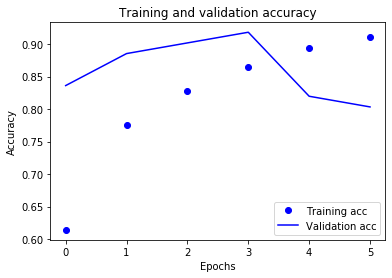

In [49]:
plots2(history)

In [44]:
model_2 = keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation=tf.nn.relu,padding="same", input_shape=x_train.shape[1:]),
    keras.layers.Conv2D(32,(3,3),activation=tf.nn.relu,padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.4),
    
    keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu,padding="same"),
    keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu,padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.5),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(5, activation=tf.nn.softmax)
])
model_2.summary()

model_2.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 75, 100, 32)       896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 100, 32)       9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 50, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 37, 50, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 50, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 37, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 18, 25, 64)       

In [ ]:
%%time
history2 = model_2.fit(x_train,y_train, epochs=10, batch_size=25, validation_data=(x_val, y_val), verbose=1)

In [ ]:
#should do 10 epochs

In [ ]:
model_2.evaluate(x_test, y_test_o)

### For Camera as Sensor Dataset (b) Only 

In [ ]:
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(data2, labels_num_subset, test_size=0.20,random_state=4567)

In [ ]:
x_train_o.shape

*Normalising the Input Images:*

In [ ]:
x_train  = normalize(x_train_o)
x_test = normalize(x_test_o)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train_o, test_size = 0.1, random_state = 2)

#### Inital Model Attempt:

In [ ]:
#model heavily inspired by AlexNet
model_4 = keras.Sequential([
    keras.layers.Conv2D(96,(11,11),strides = 4, activation=tf.nn.relu,padding="same", input_shape=x_train.shape[1:]),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    
    keras.layers.Conv2D(256,(9,9),activation=tf.nn.relu,padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(384,(6,6),activation=tf.nn.relu,padding="same"),
    keras.layers.Conv2D(384,(3,3),activation=tf.nn.relu,padding="same"),
    keras.layers.Conv2D(256,(3,3),activation=tf.nn.relu,padding="same"),
    
    
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(5, activation=tf.nn.softmax)
])
model_4.summary()

model_4.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

#### Model 2 (same model 2 as above)

In [ ]:
model_2 = keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation=tf.nn.relu,padding="same", input_shape=x_train.shape[1:]),
    keras.layers.Conv2D(32,(3,3),activation=tf.nn.relu,padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.4),
    
    keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu,padding="same"),
    keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu,padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.5),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(5, activation=tf.nn.softmax)
])
model_2.summary()

model_2.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
%%time
history = model_2.fit(x_train,y_train, epochs=25, batch_size=10, validation_data=(x_val, y_val), verbose=1)

In [ ]:
model_2.evaluate(x_test, y_test_o)

In [ ]:
## investigate further:

In [ ]:
predictions_test = model_4.predict(x_test)

In [ ]:
## this is primarily out of curiosity

errors_i = []
errors_y = []
error_yhat = []

for i in range(1196):
    if np.argmax(predictions_test[i]) != y_test_o[i]:
        errors_i.append(i) 
        errors_y.append(y_test_o[i])
        error_yhat.append(np.argmax(predictions_test[i]))


In [ ]:
print("0 = cloudy, 1 = shine, 2 = rain, 3 = fog, 4 = snow")
print("Image Number:", errors_i[0:10])

print("Actual Label", errors_y[0:10]) 

print("Predicted Label",error_yhat[0:10])